In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

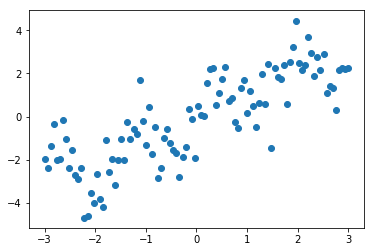

In [6]:
from figures import make_dataset
x,y=make_dataset()
#print(x,y)
X=x.reshape(-1,1)
plt.scatter(X,y)

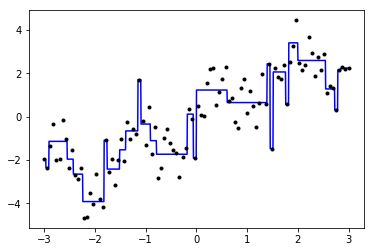

In [13]:
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor(max_depth=5)
reg.fit(X,y)
x_fit=np.linspace(-3,3,1000).reshape((-1,1))
y_fit_1=reg.predict(x_fit)
plt.plot(x_fit,y_fit_1,label='prediction',color='blue')
plt.plot(X.ravel(),y,'.k',label='training')

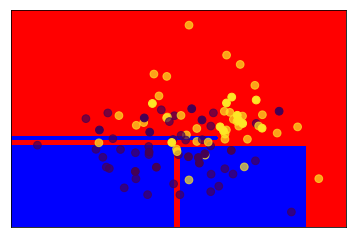

In [27]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from figures import plot_2d_separator
X, y = make_blobs(centers=[[0, 0], [1, 1]], random_state=61526, n_samples=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf=DecisionTreeClassifier(max_depth=5)
clf.fit(X_train,y_train)
plot_2d_separator(clf,X,fill=True)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, alpha=.7)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=60);

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
digits=load_digits()

X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
rf=RandomForestClassifier(n_estimators=200)
parameters={'max_features':['sqrt','log2',10],
            'max_depth':[5,7,9]}
clf_grid=GridSearchCV(rf,parameters,n_jobs=-1)
clf_grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_features': ['sqrt', 'log2', 10], 'max_depth': [5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [37]:
clf_grid.score(X_train, y_train)

1.0

In [38]:
clf_grid.score(X_test, y_test)

0.9755555555555555